<a href="https://colab.research.google.com/github/J0ug/Credit-Scroing/blob/main/Credit_Scoring.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#0. Импорт библиотек и чтение данных

[Датасет был взят с сайта Kaggle](https://www.kaggle.com/datasets/kapturovalexander/bank-credit-scoring/data)

В датасете представлены данные о клиентах португальских банков такие как: работа, семейное положение, уровень образования и т.д.
Цель классификации состоит в том, чтобы предсказать подпишет ли(да/нет) клиент срочный вклад(term deposit)

Загрузим все необходимые библиотеки

In [102]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score, f1_score

In [103]:
data = pd.read_csv("bank.csv", sep=";").drop_duplicates()
data.sample(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
575,58,retired,married,unknown,no,937,no,no,cellular,5,aug,155,1,-1,0,unknown,no
2728,60,admin.,married,secondary,no,-396,yes,no,cellular,11,may,443,1,350,1,failure,no
3808,25,technician,single,secondary,no,2157,yes,no,cellular,21,jul,339,1,-1,0,unknown,no
3627,56,services,married,secondary,no,-229,no,yes,cellular,23,jul,55,10,-1,0,unknown,no
2416,32,management,single,tertiary,no,1731,yes,yes,unknown,29,may,323,3,-1,0,unknown,no
785,23,student,married,tertiary,yes,-230,yes,no,cellular,18,may,259,2,-1,0,unknown,no
1694,58,unemployed,married,tertiary,no,1798,yes,no,cellular,5,feb,19,8,-1,0,unknown,no
3828,31,blue-collar,married,unknown,no,-120,yes,no,cellular,3,feb,100,3,201,2,failure,no
2922,26,admin.,married,tertiary,no,2855,no,no,cellular,30,mar,52,3,-1,0,unknown,no
2414,52,technician,married,secondary,no,118,no,no,cellular,28,aug,16,20,-1,0,unknown,no


В наборе данных содержится 4521 наблюдение и 17 признаков

In [104]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB




*   **age** - возраст, непрерывная величина
*   **job** - вид деятельности, категориальная переменная, требует обработки
*   **marital** - семейное положение, категориальная переменная, требует обработки
*   **education** - уровень образования, категориальная переменная, требует обработки
*   **default** - невозможность погасить кредит, бинарный признак(да/нет), требует обработки
*   **balance** - средний годовой остаток, непрерывная величина
*   **housing** - есть ли кредит на жилье?, бинарный признак(да/нет),требует обработки
*   **loan** - есть ли потребительский кредит?, бинарный признак(да/нет),требует обработки
*   **contact** - тип связи с клиентом(сотовый/стационарный телефон), требует обработки
*   **day** - последний день, когда связывались с клиентом, количественный признак
*   **month** - последний месяц, когда связывались с клиентом('jan', 'feb' и тд), категориальная переменная, требует обработки
*   **duration** - продолжительность последнеого разговора в секундах, если равно 0, то целевая переменная (y) соответственно принимает значение no, непрерывная величина
*   **campaign** - количество разговор с клиентом, количественная переменная
*   **pdays** - количество дней, с момента последнего контакта с клиентом(значение -1 указывает на то, что ранее с клиентом не связывались)
*   **previous** - количество разговоров, до текущей кампании для этого клиента, непрерывная величина
*   **poutcome** - результат прошлой маркетинговой кампании('провал', 'отсутствие результата', 'успех'), категориальный признак, требует обработки
*   **y** - целевая переменная, означающая оформил ли клиент срочный депозит(term deposit), представлена значениями yes/no, требует обработки






#1. Предобработка данных

In [105]:
data.isnull().sum()

,0
age,0
job,0
marital,0
education,0
default,0
balance,0
housing,0
loan,0
contact,0
day,0


Пропущенных значений не обнаружено

/tmp/ipython-input-1651673801.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'marital', data = data, palette = "Spectral")


<Axes: xlabel='marital', ylabel='count'>

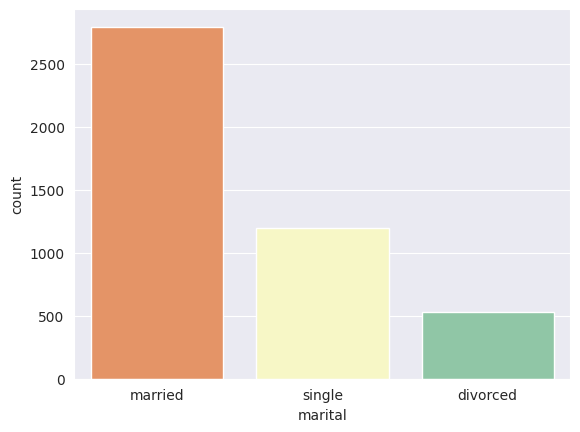

In [106]:
sns.set_style("darkgrid")
sns.countplot(x = 'marital', data = data, palette = "Spectral")

Из графика можно понять, что больше половины наблюдений имеют признак married(женат/замужем) и то, что используется всего 3 значения.

/tmp/ipython-input-3340248577.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='poutcome', data = data, palette = "Spectral")


<Axes: xlabel='poutcome', ylabel='count'>

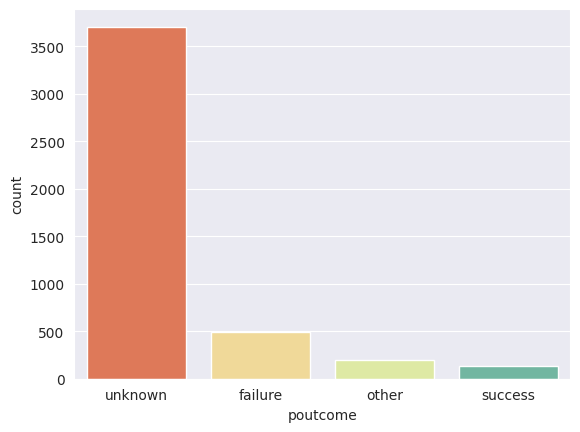

In [107]:
sns.countplot(x='poutcome', data = data, palette = "Spectral")

По графику видно, что большинство значений это 'unknown', которое подразумевает отсутствие результата. Также еще есть значение 'other', которое представлено небольшим количеством наблюдений.

/tmp/ipython-input-252322271.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='housing', data = data, palette = "Spectral")


<Axes: xlabel='housing', ylabel='count'>

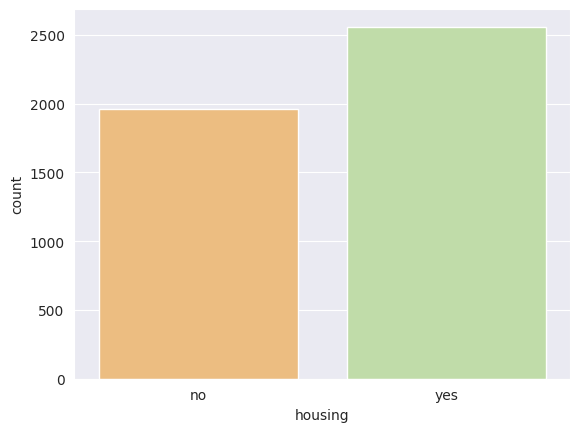

In [108]:
sns.countplot(x='housing', data = data, palette = "Spectral")

Из графика видно, что наличие/отсутствие кредита на жилье почти равны по количеству значений.

/tmp/ipython-input-289010777.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='y', data = data, palette = "Spectral")


<Axes: xlabel='y', ylabel='count'>

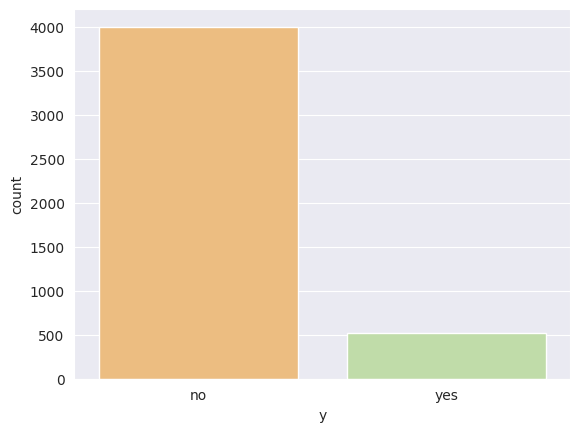

In [109]:
sns.countplot(x='y', data = data, palette = "Spectral")

Из этого графика видно, что присутствует дисбаланс классов. Перед обучением модели, нужно будет увеличить количество класса 'yes'.

In [110]:
ftr = ["job", "marital", "education", "default", "housing", "loan", "contact", "month", "poutcome", "y"]
LE = LabelEncoder()
for f in ftr:
  data[f] = LE.fit_transform(data[f])

Обработали категориальные признаки с помощью **LabelEncoder**

In [111]:
data.rename(columns={"y":"target"}, inplace=True)

Переименовали наш целевой признак из 'y' в 'target'

In [112]:
x  = data.iloc[:,:-1]
x

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,30,10,1,0,0,1787,0,0,0,19,10,79,1,-1,0,3
1,33,7,1,1,0,4789,1,1,0,11,8,220,1,339,4,0
2,35,4,2,2,0,1350,1,0,0,16,0,185,1,330,1,0
3,30,4,1,2,0,1476,1,1,2,3,6,199,4,-1,0,3
4,59,1,1,1,0,0,1,0,2,5,8,226,1,-1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,7,1,1,0,-333,1,0,0,30,5,329,5,-1,0,3
4517,57,6,1,2,1,-3313,1,1,2,9,8,153,1,-1,0,3
4518,57,9,1,1,0,295,0,0,0,19,1,151,11,-1,0,3
4519,28,1,1,1,0,1137,0,0,0,6,3,129,4,211,3,1


x - это наш датасет, без целевого признака

In [113]:
y = data.iloc[:,-1]
y

,target
0,0
1,0
2,0
3,0
4,0
...,...
4516,0
4517,0
4518,0
4519,0


y - наша целевая переменная

In [114]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler()
x,y = ros.fit_resample(x,y)

In [115]:
ms = MinMaxScaler()
Xsc = ms.fit_transform(x)
Xsc

array([[0.16176471, 0.90909091, 0.5       , ..., 0.        , 0.        ,
        1.        ],
       [0.20588235, 0.63636364, 0.5       , ..., 0.38990826, 0.16      ,
        0.        ],
       [0.23529412, 0.36363636, 1.        , ..., 0.37958716, 0.04      ,
        0.        ],
       ...,
       [0.64705882, 0.45454545, 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.10294118, 0.09090909, 1.        , ..., 0.        , 0.        ,
        1.        ],
       [0.44117647, 0.        , 0.5       , ..., 0.        , 0.        ,
        1.        ]])

Произвели масштабирование признаков

In [116]:
X_train, X_test, Y_train, Y_test = train_test_split(Xsc, y, test_size=0.2, random_state=4)

Разбили наши данные на 2 выборки: на тренировчную и тестовую

#Обучение моделей

##Метод K-ближайших соседей

In [117]:
knn = KNeighborsClassifier(algorithm='auto', n_neighbors=5, weights='distance')
knn.fit(X_train, Y_train)
knn_pred = knn.predict(X_test)
print(classification_report(Y_test, knn_pred))

              precision    recall  f1-score   support

           0       1.00      0.83      0.90       778
           1       0.86      1.00      0.92       822

    accuracy                           0.92      1600
   macro avg       0.93      0.91      0.91      1600
weighted avg       0.93      0.92      0.91      1600



In [118]:
QualityMetrics = ['Accuracy', 'Precision',
                'Recall', 'F1 Score']
Models = pd.DataFrame(index = QualityMetrics)
Models['KNeighborsClassifier'] = [
    accuracy_score(Y_test, knn_pred),
    precision_score(Y_test, knn_pred, average='weighted'),
    recall_score(Y_test, knn_pred, average='weighted'),
    f1_score(Y_test, knn_pred, average='weighted')
]

##Метод опорных векторов

In [119]:
sv = SVC(C = 10, gamma = 1, kernel = 'rbf')
sv.fit(X_train, Y_train)
sv_pred = sv.predict(X_test)
print(classification_report(Y_test, sv_pred))

              precision    recall  f1-score   support

           0       0.93      0.85      0.89       778
           1       0.87      0.94      0.90       822

    accuracy                           0.90      1600
   macro avg       0.90      0.90      0.90      1600
weighted avg       0.90      0.90      0.90      1600



In [120]:
Models['SVM'] = [
    accuracy_score(Y_test, sv_pred),
    precision_score(Y_test, sv_pred, average='weighted'),
    recall_score(Y_test, sv_pred, average='weighted'),
    f1_score(Y_test, sv_pred, average='weighted')
]

##Наивный байессовский классификатор


In [121]:
gnb = GaussianNB()
gnb.fit(X_train, Y_train)
gnb_pred = gnb.predict(X_test)
print(classification_report(Y_test, gnb_pred))

              precision    recall  f1-score   support

           0       0.73      0.72      0.73       778
           1       0.74      0.75      0.75       822

    accuracy                           0.74      1600
   macro avg       0.74      0.74      0.74      1600
weighted avg       0.74      0.74      0.74      1600



In [122]:
Models['Naive_Bayes'] = [
    accuracy_score(Y_test, gnb_pred),
    precision_score(Y_test, gnb_pred, average='weighted'),
    recall_score(Y_test, gnb_pred, average='weighted'),
    f1_score(Y_test, gnb_pred, average='weighted')
]

##Дерево решений

In [123]:
dt = DecisionTreeClassifier(criterion='entropy', max_depth=10)
dt.fit(X_train, Y_train)
dt_pred = dt.predict(X_test)
print(classification_report(Y_test, dt_pred))

              precision    recall  f1-score   support

           0       0.91      0.84      0.87       778
           1       0.86      0.92      0.89       822

    accuracy                           0.88      1600
   macro avg       0.88      0.88      0.88      1600
weighted avg       0.88      0.88      0.88      1600



In [124]:
Models['Decision_Tree_Classifier'] = [
    accuracy_score(Y_test, dt_pred),
    precision_score(Y_test, dt_pred, average='weighted'),
    recall_score(Y_test, dt_pred, average='weighted'),
    f1_score(Y_test, dt_pred, average='weighted')
]

##Случайный лес

In [125]:
rf = RandomForestClassifier(criterion='entropy', min_samples_split=4, n_estimators=200)
rf.fit(X_train, Y_train)
rf_pred = rf.predict(X_test)
print(classification_report(Y_test, rf_pred))

              precision    recall  f1-score   support

           0       1.00      0.94      0.97       778
           1       0.95      1.00      0.97       822

    accuracy                           0.97      1600
   macro avg       0.97      0.97      0.97      1600
weighted avg       0.97      0.97      0.97      1600



In [126]:
Models['Random_Forest_Classifier'] = [
    accuracy_score(Y_test, rf_pred),
    precision_score(Y_test, rf_pred, average='weighted'),
    recall_score(Y_test, rf_pred, average='weighted'),
    f1_score(Y_test, rf_pred, average='weighted')
]

##XGBoost

In [127]:
xgb = XGBClassifier()
xgb.fit(X_train, Y_train)
xgb_pred = xgb.predict(X_test)
print(classification_report(Y_test, xgb_pred))

              precision    recall  f1-score   support

           0       1.00      0.92      0.96       778
           1       0.93      1.00      0.96       822

    accuracy                           0.96      1600
   macro avg       0.96      0.96      0.96      1600
weighted avg       0.96      0.96      0.96      1600



In [128]:
Models['XGBoost'] = [
    accuracy_score(Y_test, xgb_pred),
    precision_score(Y_test, xgb_pred, average='weighted'),
    recall_score(Y_test, xgb_pred, average='weighted'),
    f1_score(Y_test, xgb_pred, average='weighted')
]

#Общие результаты

In [129]:
Models

,KNeighborsClassifier,SVM,Naive_Bayes,Decision_Tree_Classifier,Random_Forest_Classifier,XGBoost
Accuracy,0.915000,0.896250,0.738125,0.880625,0.970625,0.961250
Precision,0.927067,0.898433,0.738071,0.882609,0.972214,0.963968
Recall,0.915000,0.896250,0.738125,0.880625,0.970625,0.961250
F1 Score,0.914177,0.895982,0.738063,0.880325,0.970576,0.961150


Самый лучший результат показал Random Forest